### Experiment 1

In [1]:
from torch import nn
import numpy as np
from matplotlib import pyplot as plt
import math

In [2]:
number_of_dimensions,number_of_activations = 500,100

In [3]:
class Net1(nn.Module):
  # default weight initialization
  def __init__(self):
    super(Net1, self).__init__()
    self.fc1 = nn.Linear(number_of_dimensions,number_of_activations) 

In [4]:
class Net2(nn.Module):
  # explicit nn.init
  def __init__(self):
    super(Net2, self).__init__()
    self.fc1 = nn.Linear(number_of_dimensions,number_of_activations) 
    x = 0.2  # 1. / sqrt(4)
    nn.init.uniform_(self.fc1.weight, -x, x)
    nn.init.uniform_(self.fc1.bias, -x, x)

In [5]:
net1 = Net1()
net2 = Net2()

In [6]:
print("Default init weights: ")
print(net1.fc1.weight)

print("\n\nExplicit nn.init.uniform_ weights: ")
print(net2.fc1.weight)

Default init weights: 
Parameter containing:
tensor([[ 0.0385, -0.0265, -0.0367,  ...,  0.0442,  0.0266,  0.0286],
        [ 0.0068,  0.0219,  0.0188,  ...,  0.0344, -0.0014,  0.0153],
        [ 0.0204, -0.0221,  0.0195,  ..., -0.0366, -0.0242,  0.0346],
        ...,
        [-0.0145, -0.0111, -0.0146,  ...,  0.0356,  0.0184, -0.0066],
        [ 0.0062,  0.0372, -0.0386,  ...,  0.0277, -0.0427,  0.0271],
        [-0.0098, -0.0172,  0.0178,  ...,  0.0291, -0.0170, -0.0246]],
       requires_grad=True)


Explicit nn.init.uniform_ weights: 
Parameter containing:
tensor([[-0.1232,  0.1910,  0.0260,  ...,  0.1831, -0.0554,  0.1540],
        [ 0.1513, -0.0194,  0.1941,  ..., -0.0770,  0.1285, -0.0029],
        [ 0.0040, -0.1023,  0.1441,  ..., -0.0664,  0.1795, -0.1040],
        ...,
        [ 0.1063,  0.1575, -0.1438,  ...,  0.0740, -0.0718,  0.1033],
        [-0.1864, -0.0622,  0.0117,  ...,  0.1777,  0.0026,  0.0536],
        [ 0.0329, -0.0766,  0.0742,  ...,  0.0392, -0.0995, -0.0212]],


In [7]:
#Numpy variant
print("Default init weights: ")
print(net1.fc1.weight.detach().numpy())

print("\n\nExplicit nn.init.uniform_ weights: ")
print(net2.fc1.weight.detach().numpy())

Default init weights: 
[[ 0.0385165  -0.02646448 -0.03667587 ...  0.04422266  0.02657046
   0.02864505]
 [ 0.00678397  0.0218991   0.0188037  ...  0.03438147 -0.00142012
   0.01528051]
 [ 0.02037961 -0.02207854  0.01953059 ... -0.0365597  -0.0242158
   0.03464742]
 ...
 [-0.01445154 -0.01106464 -0.01463124 ...  0.03556912  0.01836796
  -0.00661514]
 [ 0.00618476  0.03723408 -0.03863303 ...  0.02772732 -0.04271461
   0.02714888]
 [-0.0098145  -0.0171518   0.01777223 ...  0.02911189 -0.01695923
  -0.02461182]]


Explicit nn.init.uniform_ weights: 
[[-0.12317755  0.19095792  0.02597351 ...  0.18313639 -0.0554053
   0.15399401]
 [ 0.15133332 -0.01941785  0.1941384  ... -0.07696505  0.1285197
  -0.00294733]
 [ 0.00402407 -0.10229915  0.14414419 ... -0.06636409  0.17954816
  -0.10397341]
 ...
 [ 0.10629483  0.1575131  -0.14382263 ...  0.07398947 -0.0718441
   0.10331447]
 [-0.18641749 -0.06217746  0.01171342 ...  0.17771767  0.00258262
   0.05359446]
 [ 0.03286819 -0.07660766  0.07424249 ...

(array([45., 59., 41., 43., 47., 58., 48., 53., 54., 52.]),
 array([-0.04463869, -0.03573334, -0.02682799, -0.01792264, -0.00901729,
        -0.00011194,  0.00879341,  0.01769875,  0.0266041 ,  0.03550945,
         0.0444148 ], dtype=float32),
 <a list of 10 Patch objects>)

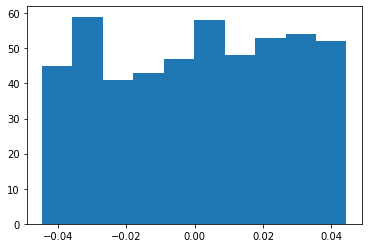

In [8]:
#Histogram of default weights
plt.hist(net1.fc1.weight.detach().numpy()[0])

In [9]:
# the above chart is actually created from
# self.weight.data.uniform_(-stdv, stdv)
# where stdv is estimated from 
# stdv = 1. / math.sqrt(self.weight.size(1))

# validate
print("stdv is: ", 1. / math.sqrt(number_of_dimensions)) 

stdv is:  0.044721359549995794


(array([54., 54., 50., 49., 38., 54., 52., 53., 64., 32.]),
 array([-0.19993122, -0.16001047, -0.12008974, -0.08016899, -0.04024825,
        -0.00032751,  0.03959323,  0.07951397,  0.11943471,  0.15935545,
         0.1992762 ], dtype=float32),
 <a list of 10 Patch objects>)

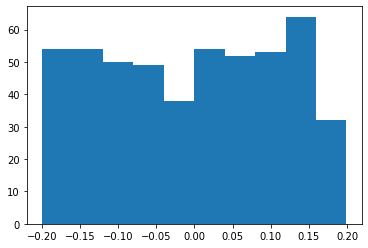

In [10]:
#Histogram of custom weights
plt.hist(net2.fc1.weight.detach().numpy()[0])

### Experiment 2